In [ ]:
import numpy as np
from scipy.linalg import eig, eigh, lstsq
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# PageRank Algorithm

In [9]:
M = np.array([
    [0, 0, 1/2, 0],
    [1/3, 0, 0, 1/2],
    [1/3, 1/2, 0, 1/2],
    [1/3, 1/2, 1/2, 0]
])

eigenvalues, eigenvectors = eig(M)

# Find the index of the dominant eigenvalue
index = np.argmax(np.real(eigenvalues))

# Get the corresponding eigenvector
dominant_vector = np.real(eigenvectors[:, index])

# Normalize so sum = 1
dominant_vector = dominant_vector / np.sum(dominant_vector)

print("PageRank scores: ",dominant_vector)

v = np.ones(4) / 4  # Rank of M is 4

# Iterate until convergence
for i in range(100):
    v_next = np.dot(M,v)
    if np.linalg.norm(v_next - v, 1) < 1e-4:  # check if difference between vectors is small
        break
    v = v_next

v = v / np.sum(v) # Normalize
print("Iterated vector until convergence: ",v)
print(f'3) Each entry in the vector represents the PageRank score of the four websites. They are the probability that someone will click on the specific website when on another website')
print(f'4) Websites 3 and 4 are tied for highest rank. Reasons for why can be the websites have several links coming from other websites, or those links are highly ranked themselves.')

PageRank scores:  [0.15789474 0.21052632 0.31578947 0.31578947]
Iterated vector until convergence:  [0.15791377 0.21052758 0.31577932 0.31577932]
3) Each entry in the vector represents the PageRank score of the four websites. They are the probability that someone will click on the specific website when on another website
4) Websites 3 and 4 are tied for highest rank. Reasons for why can be the websites have several links coming from other websites, or those links are highly ranked themselves.


# Dimensionality Reduction via PCA

Covariance matrix:
 [[1.02608749 0.11769063]
 [0.11769063 1.08134929]]

Eigenvalues:
 [1.17460905 0.93282774]

Eigenvectors (Principal Components):
 [[ 0.62106317 -0.78376051]
 [ 0.78376051  0.62106317]]

Explained variance ratio:
 [0.55736383 0.44263617]
3) The first component, PC1, explains the most variance at about 56%. PC2 explains about 44% of the variance.


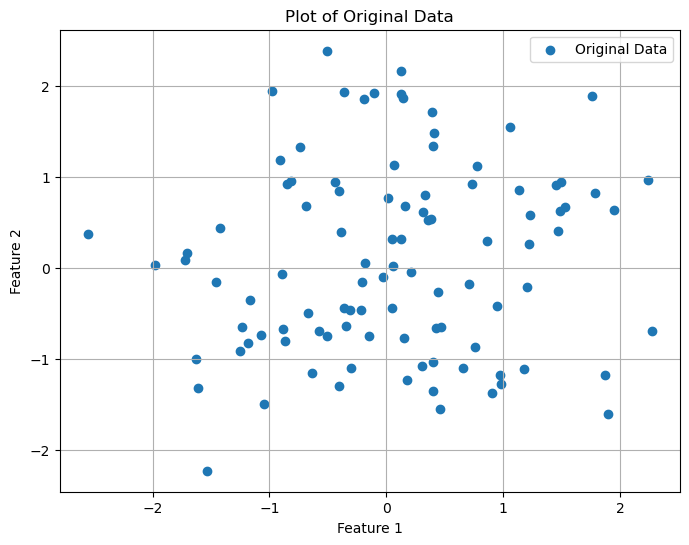

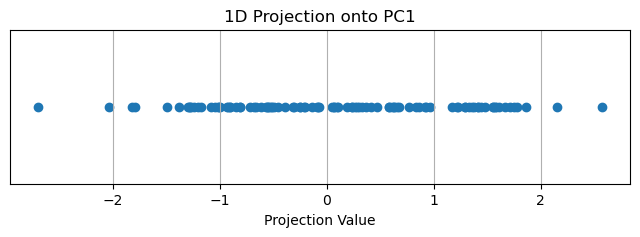

In [25]:
# Load csv and select only the two numeric columns (height and weight)
data = pd.read_csv("data.csv").select_dtypes(include=[np.number]).to_numpy()

# Compute covariance matrix
cov_matrix = np.cov(data.T)
print("Covariance matrix:\n", cov_matrix)

# Eigenvalue decomposition on covariance matrix
eigenvalues, eigenvectors = eigh(cov_matrix)

# Sort in descending order
index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[index]
eigenvectors = eigenvectors[:, index]

print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors (Principal Components):\n", eigenvectors)

# Find principal component and explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nExplained variance ratio:\n", explained_variance_ratio)
print(f"3) The first component, PC1, explains the most variance at about 56%. PC2 explains about 44% of the variance.")

# Reduce dataset to 1D by projecting onto PC1 (captures most variance)
pc1 = eigenvectors[:, 0] # first principal component
data_projection = data @ pc1 # 1D projection 

# Plot original data 
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Plot of Original Data")
plt.legend()
plt.grid(True)
plt.show()

# Plot 1D projection
plt.figure(figsize=(8, 2))
plt.scatter(data_projection, np.zeros_like(data_projection))
plt.title("1D Projection onto PC1")
plt.xlabel("Projection Value")
plt.yticks([])
plt.grid(True)
plt.show()

# Linear Regression Via Least Squares

In [20]:
# Intialize X and y matrices
X = np.array([
    [2100, 3, 20],
    [2500, 4, 15],
    [1800, 2, 30],
    [2200, 3, 25]
], dtype=float)

y = np.array([460, 540, 330, 400], dtype=float)

# Solve for beta using lstsq
beta, res, rnk, s = lstsq(X, y)
print("Least-squares solution:")
print(beta)

# Predict price of new house
new_house = np.array([2400, 3, 20], dtype=float)
predicted_price = new_house @ beta
print(f"\nPredicted price for the new house: ${predicted_price:.2f}")

# Discussion of role of least-squares vs other methods like solve
print("\nDiscussion:")
print("Least squares (lstsq) finds a beta that minimizes ||Xβ - y||², even when X is not square or not invertible.")
print("In this dataset, X is a 4×3 matrix, so it is not square. Furthermore, there is no exact solution.")
print("lstsq produces the best-fit solution by projecting y onto the column space of X.")
print("scipy.linalg.solve requires a square, invertible matrix and cannot be used here.")


Least-squares solution:
[    3.2875 -1628.75     -77.75  ]

Predicted price for the new house: $1448.75

Discussion:
Least squares (lstsq) finds a beta that minimizes ||Xβ - y||², even when X is not square or not invertible.
In this dataset, X is a 4×3 matrix, so it is not square. Furthermore, there is no exact solution.
lstsq produces the best-fit solution by projecting y onto the column space of X.
scipy.linalg.solve requires a square, invertible matrix and cannot be used here.


# Gradient Descent for Minimizing Loss Function 

Final loss: 1.5926899324933887e-32


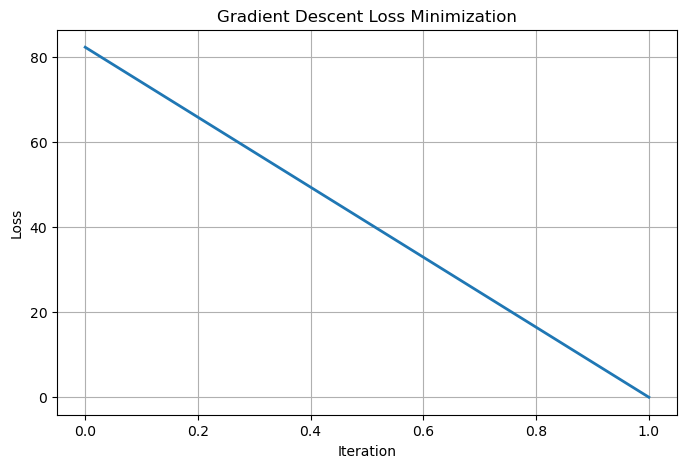

In [23]:
# Initialize matrix X and matrix A
np.random.seed(0)
X = np.random.randn(100, 50)
A = np.random.randn(100, 50)

# Flatten X because scipy.optimize.minimize works with 1D vectors
x0 = X.flatten()

# Define loss function 
def loss(x):
    X = x.reshape(100, 50)
    return 0.5 * np.sum((X - A)**2)

# Define gradient of loss function
def grad(x):
    X = x.reshape(100, 50)
    g = (X - A)
    return g.flatten()

# Track loss values
loss_history = []
def callback(x):
    loss_history.append(loss(x))

# Implement gradient descent
result = minimize(
    fun=loss,
    x0=x0,
    jac=grad,
    method='CG', # Conjugate Gradient 
    callback=callback,
    tol=1e-6,
    options={'maxiter': 1000}
)

# Final optimized X
X_optimized = result.x.reshape(100, 50)
print("Final loss:", loss_history[-1])

# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(loss_history, linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Gradient Descent Loss Minimization")
plt.grid(True)
plt.show()
